In [ ]:
###
#in_channels(int) - 输入图像的通道数。
#out_channels(int) - 卷积核的个数，和输出特征图通道数相同，相当于上文中的CoutC_{out}C 
#out
#​
# 。
#kernel_size(int|list|tuple) - 卷积核大小，可以是整数，比如3，表示卷积核的高和宽均为3 ；或者是两个整数的list，例如[3,2]，表示卷积核的高为3，宽为2。
#stride(int|list|tuple，可选) - 步长大小，可以是整数，默认值为1，表示垂直和水平滑动步幅均为1；或者是两个整数的list，例如[3,2]，表示垂直滑动步幅为3，水平滑动步幅为2。
#padding(int|list|tuple|str，可选) - 填充大小，可以是整数，比如1，表示竖直和水平边界填充大小均为1；或者是两个整数的list，例如[2,1]，表示竖直边界填充大小为2，水平边界填充大小为1。
###

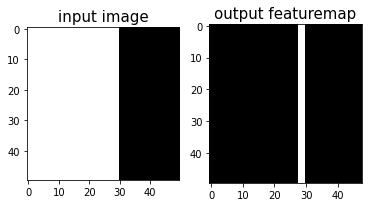

Parameter containing:
Tensor(shape=[1, 1, 1, 3], dtype=float32, place=Place(gpu:0), stop_gradient=False,
       [[[[ 1.,  0., -1.]]]])
Parameter containing:
Tensor(shape=[1], dtype=float32, place=Place(gpu:0), stop_gradient=False,
       [0.])


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import paddle
from paddle.nn import Conv2D
from paddle.nn.initializer import Assign
%matplotlib inline

# 创建初始化权重参数w
w = np.array([1, 0, -1], dtype='float32')
# 将权重参数调整成维度为[cout, cin, kh, kw]的四维张量
w = w.reshape([1, 1, 1, 3])
# 创建卷积算子，设置输出通道数，卷积核大小，和初始化权重参数
# kernel_size = [1, 3]表示kh = 1, kw=3
# 创建卷积算子的时候，通过参数属性weight_attr指定参数初始化方式
# 这里的初始化方式时，从numpy.ndarray初始化卷积参数
conv = Conv2D(in_channels=1, out_channels=1, kernel_size=[1, 3],
       weight_attr=paddle.ParamAttr(
          initializer=Assign(value=w)))

# 创建输入图片，图片左边的像素点取值为1，右边的像素点取值为0
img = np.ones([50,50], dtype='float32')
img[:, 30:] = 0.
# 将图片形状调整为[N, C, H, W]的形式
x = img.reshape([1,1,50,50])
# 将numpy.ndarray转化成paddle中的tensor
x = paddle.to_tensor(x)
# 使用卷积算子作用在输入图片上
y = conv(x)
# 将输出tensor转化为numpy.ndarray
out = y.numpy()
f = plt.subplot(121)
f.set_title('input image', fontsize=15)
plt.imshow(img, cmap='gray')
f = plt.subplot(122)
f.set_title('output featuremap', fontsize=15)
# 卷积算子Conv2D输出数据形状为[N, C, H, W]形式
# 此处N, C=1，输出数据形状为[1, 1, H, W]，是4维数组
# 但是画图函数plt.imshow画灰度图时，只接受2维数组
# 通过numpy.squeeze函数将大小为1的维度消除
plt.imshow(out.squeeze(), cmap='gray')
plt.show()
# 查看卷积层的权重参数名字和数值
print(conv.weight)
# 参看卷积层的偏置参数名字和数值
print(conv.bias)

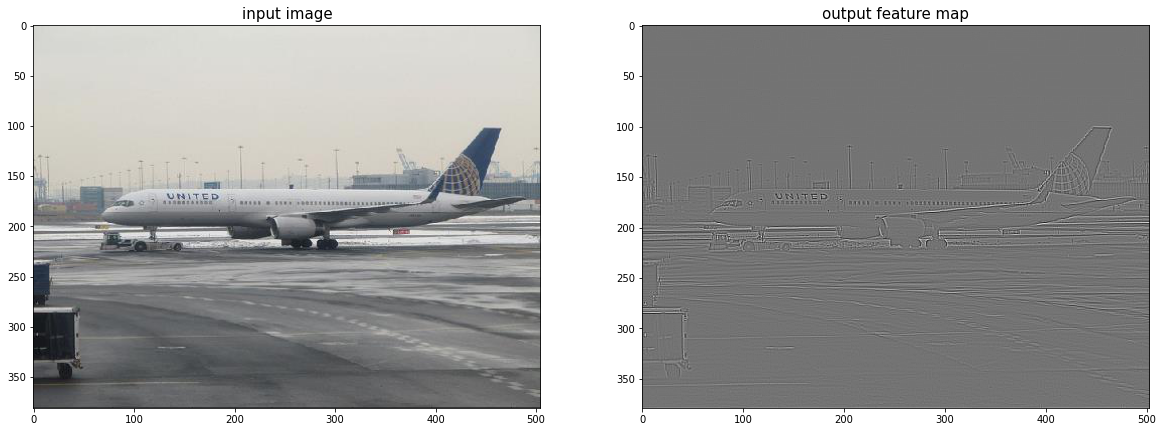

In [4]:
#边缘检测

import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import paddle
from paddle.nn import Conv2D
from paddle.nn.initializer import Assign
img = Image.open('../db/airplane.jpg')

# 设置卷积核参数
w = np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]], dtype='float32')/8
w = w.reshape([1, 1, 3, 3])
# 由于输入通道数是3，将卷积核的形状从[1,1,3,3]调整为[1,3,3,3]
w = np.repeat(w, 3, axis=1)
# 创建卷积算子，输出通道数为1，卷积核大小为3x3，
# 并使用上面的设置好的数值作为卷积核权重的初始化参数
conv = Conv2D(in_channels=3, out_channels=1, kernel_size=[3, 3], 
            weight_attr=paddle.ParamAttr(
              initializer=Assign(value=w)))
    
# 将读入的图片转化为float32类型的numpy.ndarray
x = np.array(img).astype('float32')
# 图片读入成ndarry时，形状是[H, W, 3]，
# 将通道这一维度调整到最前面
x = np.transpose(x, (2,0,1))
# 将数据形状调整为[N, C, H, W]格式
x = x.reshape(1, 3, img.height, img.width)
x = paddle.to_tensor(x)
y = conv(x)
out = y.numpy()
plt.figure(figsize=(20, 10))
f = plt.subplot(121)
f.set_title('input image', fontsize=15)
plt.imshow(img)
f = plt.subplot(122)
f.set_title('output feature map', fontsize=15)
plt.imshow(out.squeeze(), cmap='gray')
plt.show()

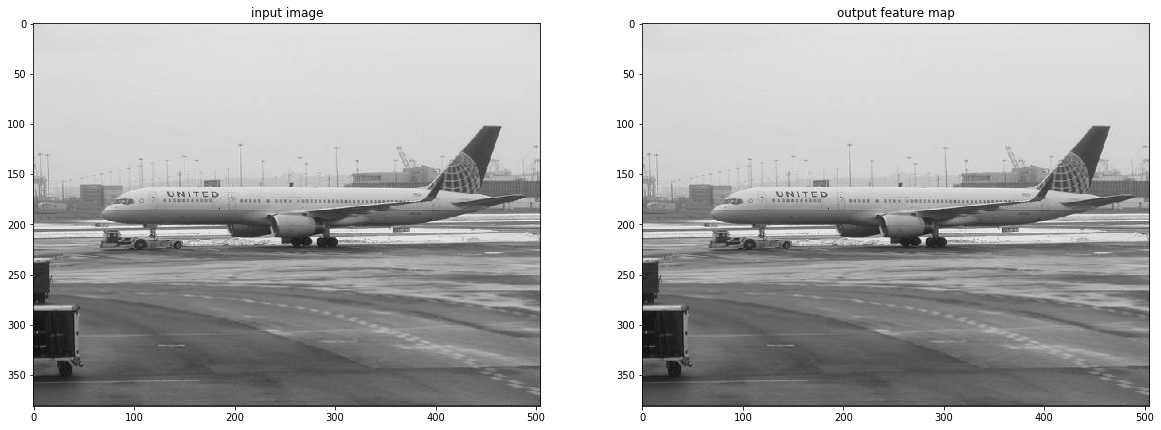

In [14]:
#图像均值模糊
import paddle
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from paddle.nn import Conv2D
from paddle.nn.initializer import Assign
# 读入图片并转成numpy.ndarray
# 换成灰度图
img = Image.open('../db/airplane.jpg').convert('L')
img = np.array(img)

# 创建初始化参数
w = np.ones([1, 1, 1, 1], dtype = 'float32')/100
conv = Conv2D(in_channels=1, out_channels=1, kernel_size=[10, 10], 
        weight_attr=paddle.ParamAttr(
         initializer=Assign(value=w)))
x = img.astype('float32')
x = x.reshape(1,1,img.shape[0], img.shape[1])
x = paddle.to_tensor(x)
y = conv(x)
out = y.numpy()

plt.figure(figsize=(20, 12))
f = plt.subplot(121)
f.set_title('input image')
plt.imshow(img, cmap='gray')

f = plt.subplot(122)
f.set_title('output feature map')
out = out.squeeze()
plt.imshow(out, cmap='gray')

plt.show()

In [ ]:
#池化，最大池化，平均池化
